In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_org_df = pd.read_csv('./inputdata/train.csv')
test_org_df = pd.read_csv('./inputdata/test.csv')

In [3]:
train_df = train_org_df.copy()
test_df = test_org_df.copy()

In [4]:
pd.set_option('display.max_columns', 50)

## Data definitions

- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Sample Notebook

- https://www.kaggle.com/sinakhorami/titanic-best-working-classifier
- https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [5]:
display(train_df.describe())
display(train_df.describe(include=['O']))
display(train_df.info())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kelly, Miss. Mary",male,CA. 2343,G6,S
freq,1,577,7,4,644


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [6]:
display(test_df.describe())
display(test_df.describe(include=['O']))
display(test_df.info())

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Chapman, Mrs. John Henry (Sara Elizabeth Lawry)",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [7]:
all_data = [train_df, test_df]

In [8]:
train_df[['Survived', 'Pclass']].groupby('Pclass').mean().sort_values(by='Pclass', ascending=False).style.bar(color=["blue"], axis=0, align='mid')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [9]:
train_df[['Survived', 'Sex']].groupby('Sex').mean().sort_values(by='Sex', ascending=False)

,Survived
Sex,
male,0.188908
female,0.742038


In [10]:
def calc_family_size(x):
    return x['SibSp'] + x['Parch'] + 1

In [11]:
train_df['FamilySize'] = train_df.apply(lambda x: calc_family_size(x), axis=1)
test_df['FamilySize'] = test_df.apply(lambda x: calc_family_size(x), axis=1)
train_df[['Survived', 'FamilySize']].groupby('FamilySize').mean().sort_values(by='FamilySize', ascending=False).style.bar(color=["blue"], axis=0, align='mid')

,Survived
FamilySize,
11,0.000000
8,0.000000
7,0.333333
6,0.136364
5,0.200000
4,0.724138
3,0.578431
2,0.552795
1,0.303538


In [12]:
def calc_is_alone(x):
    if x['FamilySize'] == 1:
        return 1
    return 0

In [13]:
train_df['IsAlone'] = train_df.apply(lambda x: calc_is_alone(x), axis=1)
test_df['IsAlone'] = test_df.apply(lambda x: calc_is_alone(x), axis=1)
train_df[['Survived', 'IsAlone']].groupby('IsAlone').mean().sort_values(by='IsAlone', ascending=False).style.bar(color=["blue"], axis=0, align='mid')

,Survived
IsAlone,
1,0.303538
0,0.505650


In [14]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')
train_df[['Survived', 'Embarked']].groupby('Embarked').mean().sort_values(by='Embarked', ascending=False).style.bar(color=["blue"], axis=0, align='mid')

,Survived
Embarked,
S,0.339009
Q,0.389610
C,0.553571


In [15]:
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].median())

In [16]:
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4, labels=[1, 2, 3, 4])
test_df['CategoricalFare'] = pd.qcut(test_df['Fare'], 4, labels=[1, 2, 3, 4])
train_df[['Survived', 'CategoricalFare']].groupby('CategoricalFare').mean().style.bar(color=['blue'], axis=0, align='mid')

,Survived
CategoricalFare,
1,0.197309
2,0.303571
3,0.454955
4,0.581081


In [17]:
print(train_df['Age'].isnull().sum(), test_df['Age'].isnull().sum())

177 86


In [18]:
def fill_age(dataset):
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

In [19]:
fill_age(train_df)
fill_age(test_df)

In [20]:
print(train_df['Age'].isnull().sum(), test_df['Age'].isnull().sum())

0 0


In [21]:
_, age_bins = pd.cut(train_df['Age'], 5, retbins=True)
print(age_bins)
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5, labels=[1, 2, 3, 4, 5])
test_df['CategoricalAge'] = pd.cut(test_df['Age'], 5, labels=[1, 2, 3, 4, 5])
train_df[['Survived', 'CategoricalAge']].groupby('CategoricalAge').mean().style.bar(color=['blue'], axis=0, align='mid')

[-0.08 16.   32.   48.   64.   80.  ]


,Survived
CategoricalAge,
1,0.513514
2,0.354486
3,0.378601
4,0.434783
5,0.090909


In [22]:
import re

rare_title = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        t = title_search.group(1)
        if t in rare_title:
            return 'Rare'
        elif t in ['Mlle', 'Mss']:
            return 'Miss'
        elif t in ['Mms']:
            return 'Mr'
        else:
            return t
    return ''

In [23]:
train_df['Title'] = train_df['Name'].apply(get_title)
test_df['Title'] = test_df['Name'].apply(get_title)
train_df[['Survived', 'Title']].groupby('Title').mean().style.bar(color=['blue'], axis=0, align='mid')

,Survived
Title,
Master,0.575000
Miss,0.701087
Mme,1.000000
Mr,0.156673
Mrs,0.792000
Ms,1.000000
Rare,0.347826


In [24]:
print(train_df['Title'].isnull().sum(), test_df['Title'].isnull().sum())

0 0


In [25]:
train_df['SexCategory'] = train_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
test_df['SexCategory'] = test_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [26]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

train_df['Title'] = train_df['Title'].map(title_mapping)
train_df['Title'] = train_df['Title'].fillna(0)

test_df['Title'] = test_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].fillna(0)

In [27]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [28]:
train_df_ready = train_df.copy()
test_df_ready = test_df.copy()

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Sex']
train_df_ready.drop(drop_elements, axis=1, inplace=True)
test_df_ready.drop(drop_elements, axis=1, inplace=True)

print(train_df_ready.head(10))

   Survived  Pclass  Age     Fare  Embarked  FamilySize  IsAlone  \
0         0       3   22   7.2500         0           2        0   
1         1       1   38  71.2833         1           2        0   
2         1       3   26   7.9250         0           1        1   
3         1       1   35  53.1000         0           2        0   
4         0       3   35   8.0500         0           1        1   
5         0       3   27   8.4583         2           1        1   
6         0       1   54  51.8625         0           1        1   
7         0       3    2  21.0750         0           5        0   
8         1       3   27  11.1333         0           3        0   
9         1       2   14  30.0708         1           2        0   

  CategoricalFare CategoricalAge  Title  SexCategory  
0               1              2    1.0            1  
1               4              3    3.0            0  
2               2              2    2.0            0  
3               4              

,Classifier,Accuracy
0,KNeighborsClassifier,0.810000
0,SVC,0.828889
0,DecisionTreeClassifier,0.822222
0,RandomForestClassifier,0.836667
0,AdaBoostClassifier,0.823333
0,GradientBoostingClassifier,0.810000
0,GaussianNB,0.784444
0,LinearDiscriminantAnalysis,0.806667
0,QuadraticDiscriminantAnalysis,0.811111
0,LogisticRegression,0.803333


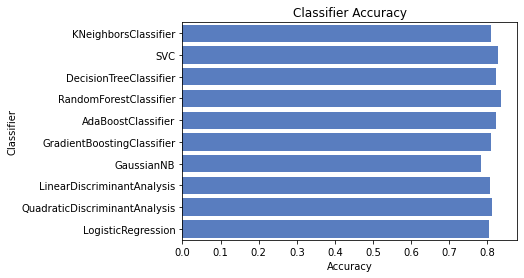

In [67]:
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(max_iter=1000)
]

log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

features = [
    'Pclass',
    'Embarked',
    'FamilySize',
    'IsAlone',
    'CategoricalFare',
    'CategoricalAge',
    'Title',
    'SexCategory'
]

X = train_df_ready[features].values
y = train_df_ready['Survived'].values

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
display(log)

In [69]:
candidate_classifier = RandomForestClassifier()
candidate_classifier.fit(X, y)
result = candidate_classifier.predict(test_df_ready[features])

In [70]:
result_df = pd.DataFrame(result)
print(result_df.shape, test_df_ready.shape)

(418, 1) (418, 10)


In [71]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': result
})

In [72]:
submission.to_csv('./inputdata/submission.csv', index=False)